In [109]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import periodogram
import seaborn as sns
import matplotlib
%matplotlib inline

# Open pickle containing fitted srm instance

In [2]:
srm_pickle_path = '/home/homeGlobal/oli/somato/scratch/srm/srm.p'

with open(srm_pickle_path, 'rb') as f:
    srm = pickle.load(f)

# Plot heatmap of extracted shared responses

SRM: Features X Time-points  (50, 256)


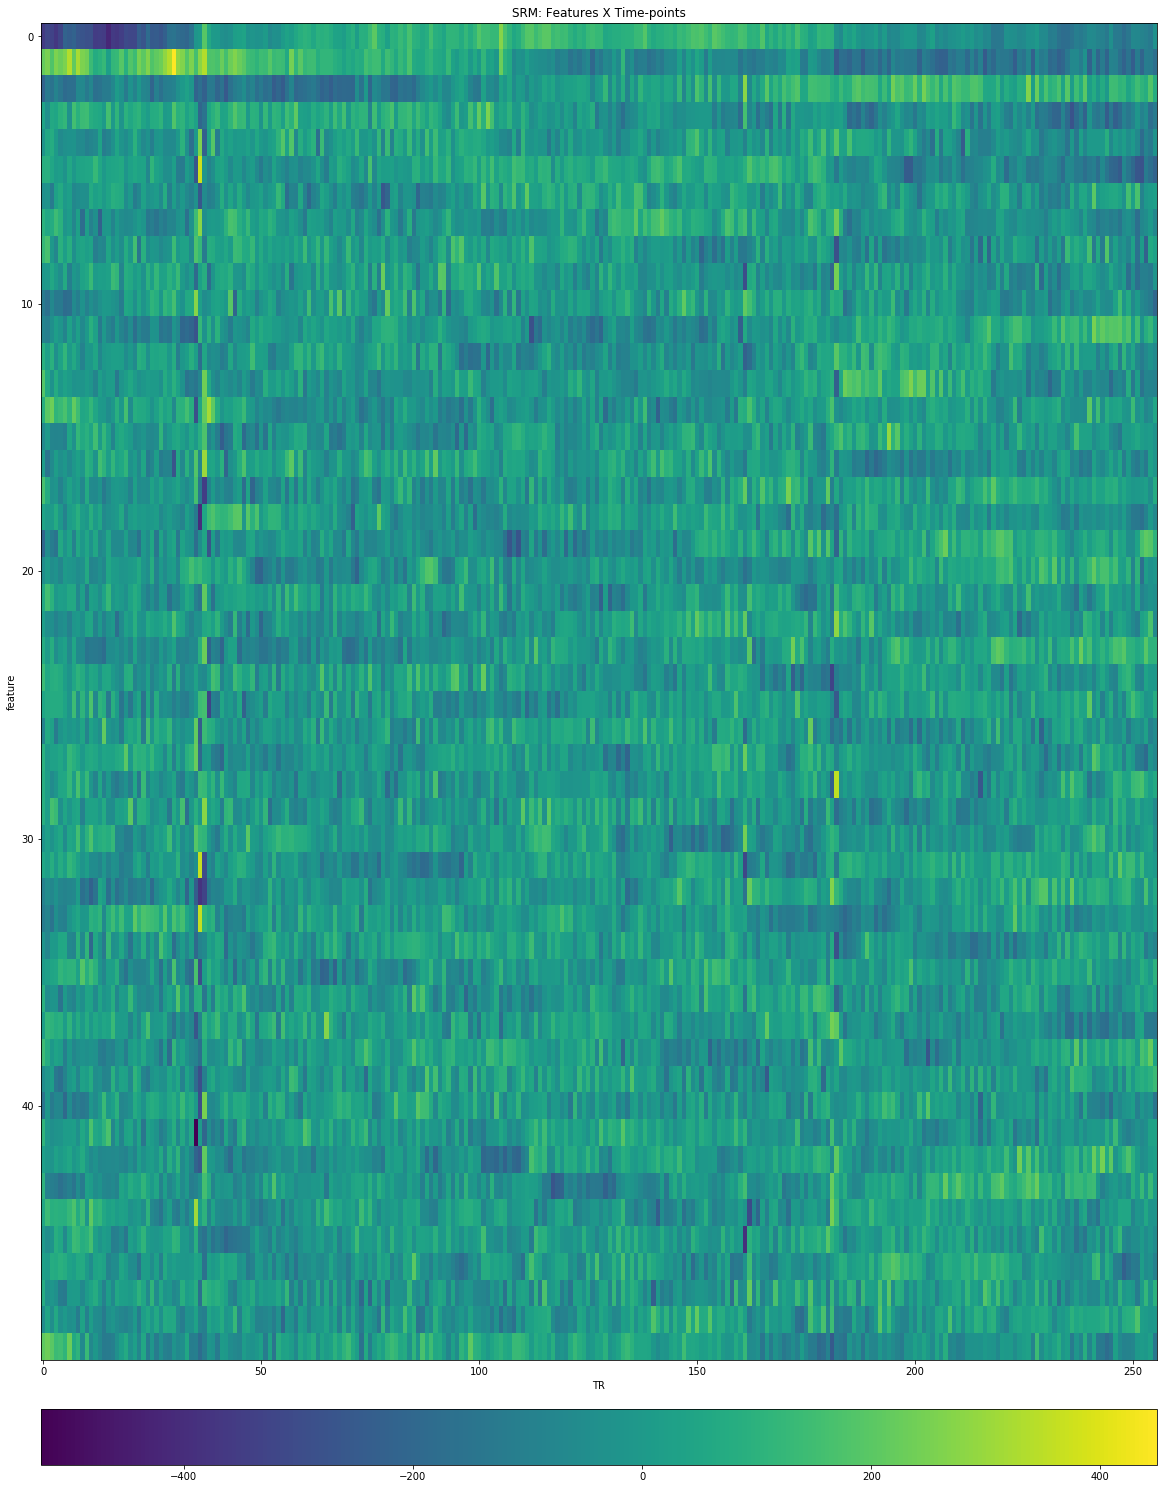

In [40]:
# Plot the shared response
print('SRM: Features X Time-points ', srm.s_.shape)
plt.figure(figsize=(20, 30))
plt.title('SRM: Features X Time-points')
plt.xlabel('TR')
plt.ylabel('feature')
plt.imshow(srm.s_, cmap='viridis', aspect='auto')
plt.colorbar(orientation='horizontal', pad=.03)  #fraction=0.03, 

# Plot time course of specific shared response

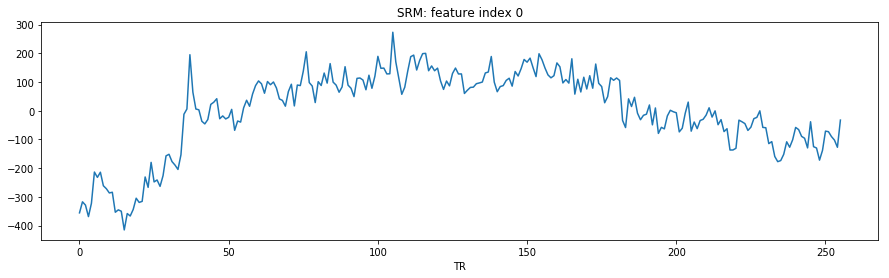

In [11]:
comp_idx = 0

plt.figure(figsize=(15, 4))
plt.title('SRM: feature index %i' % comp_idx)
plt.xlabel('TR')
plt.plot(srm.s_[comp_idx, :]);

# Power density spectra of all shared responses

Presented in a heat map (not very informative) and individual line plots.

In [97]:
# extrect powerdensities and frequencies for all our shared responses
# (frequencies list will be redundant repetitions)

frequencies, powerdensities = [], []

for comp in range(len(srm.s_)):
    freq, power = periodogram(srm.s_[comp,:])
    frequencies.append(freq)
    powerdensities.append(power)
    
frequencies = np.array(frequencies)
powerdensities = np.array(powerdensities)

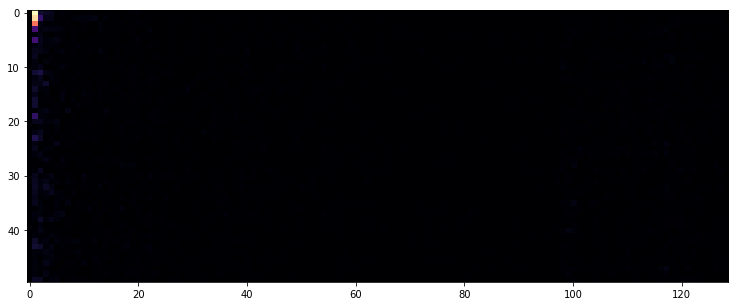

In [98]:
# plot as heatmap
plt.figure(figsize=(20, 5))
plt.imshow(powerdensities, cmap='magma')

Not surprisingly, the heatmap is mostly black because most power lies in lower range frequencies. Next, we will plot individual power density line plots across the frequency spectrum. Our stimulation frequency is marked as a red line.

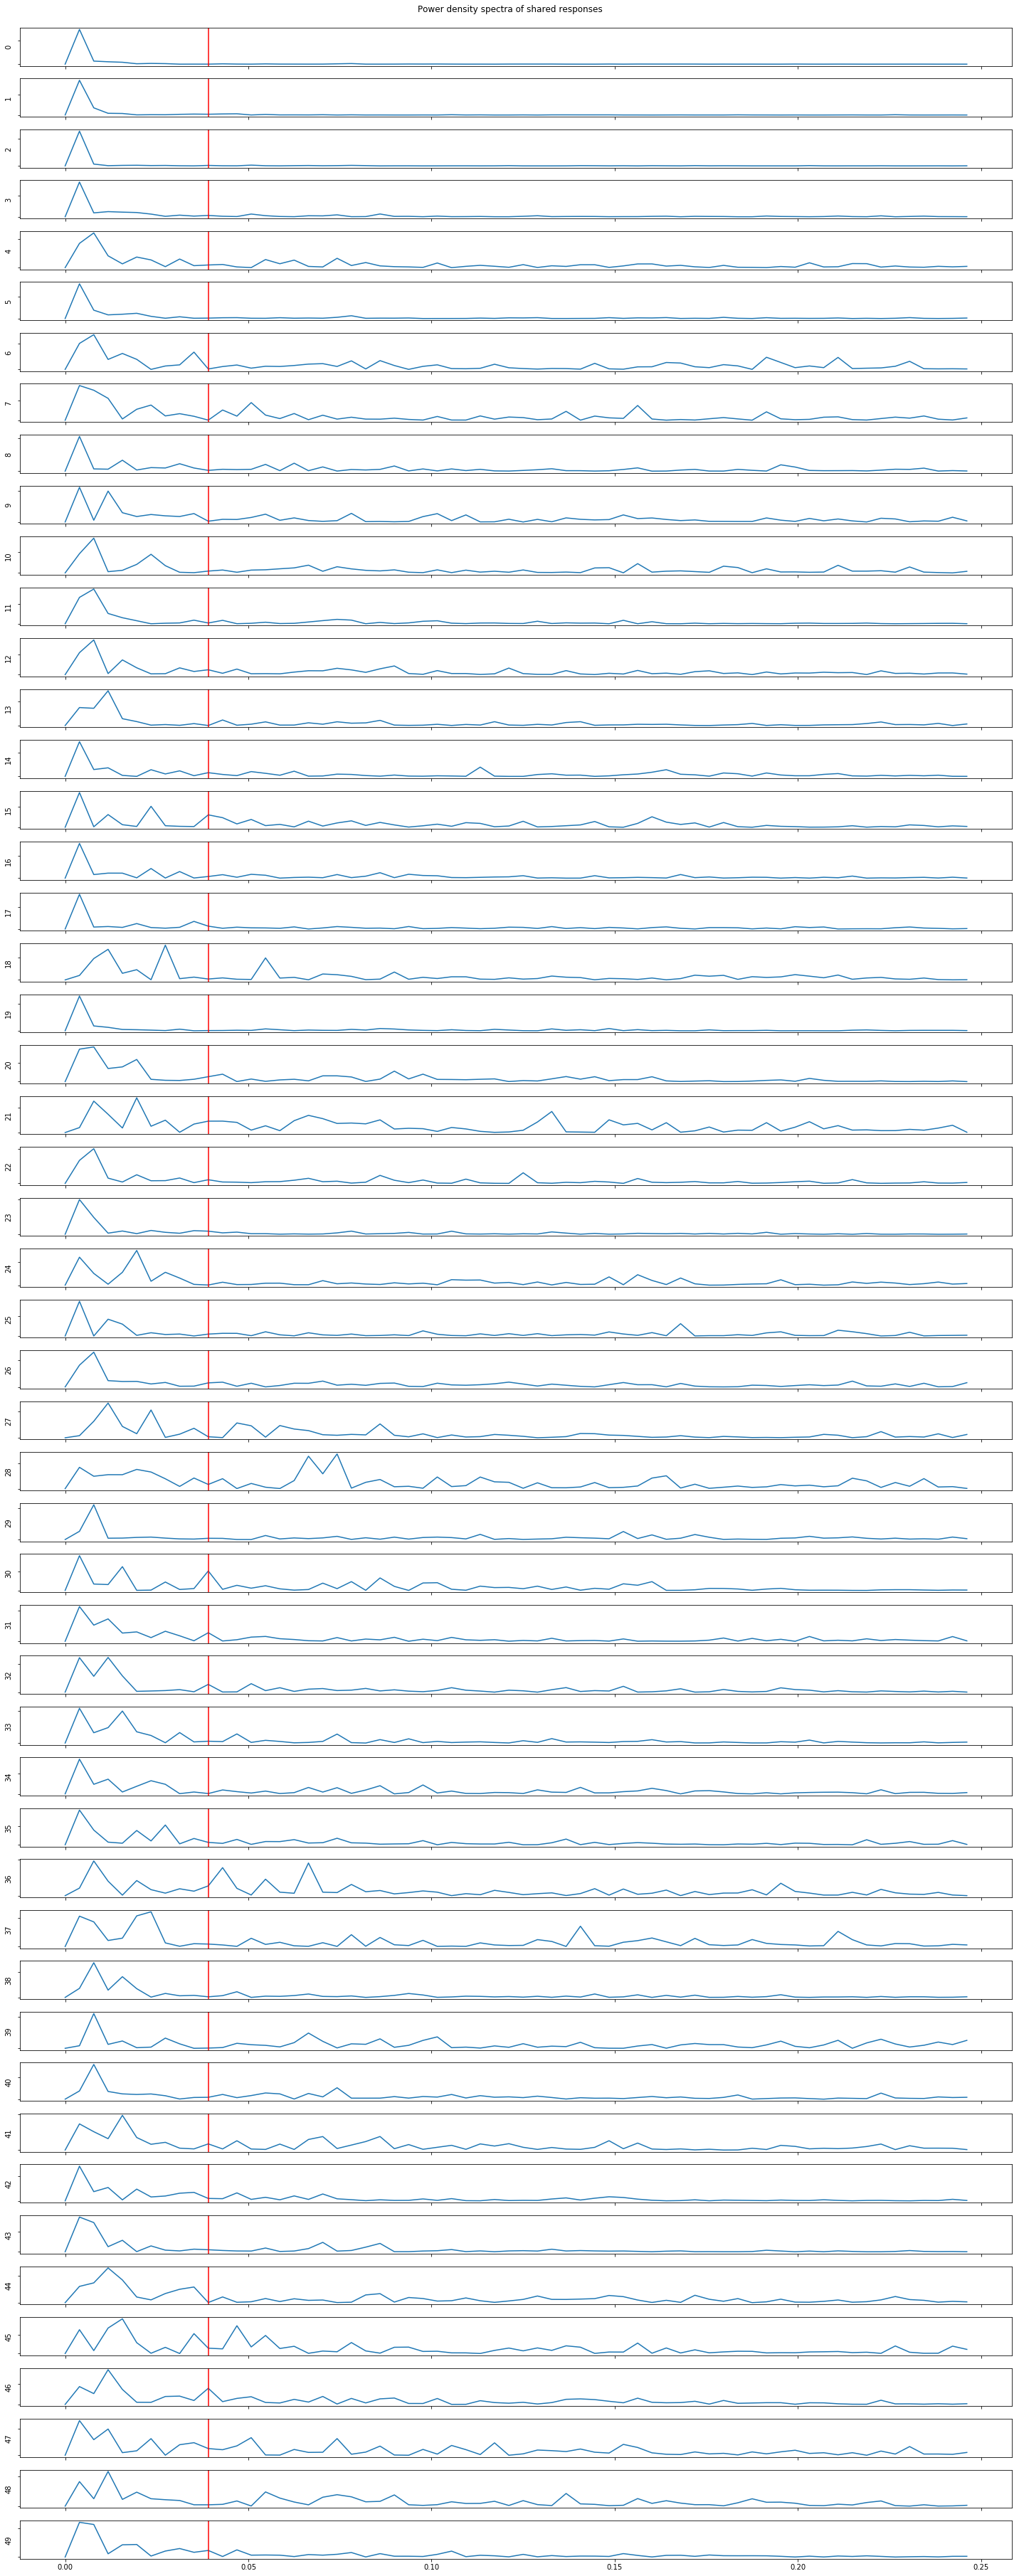

In [145]:
# only show lower half of frequency spectrum to avoid clutter
cut_to_length = int(len(powerdensities[comp_idx,:]) / 2)

fig, axs = plt.subplots(nrows=len(srm.s_), figsize=(20,50))
fig.suptitle('Power density spectra of shared responses', y=1.005)

for comp_idx in range(len(srm.s_)):
    sns.lineplot(y=powerdensities[comp_idx,:cut_to_length],
                 x=frequencies[comp_idx,:cut_to_length],
                 ax=axs[comp_idx])
    axs[comp_idx].axvline(0.0390625, color='red')
    axs[comp_idx].set_yticklabels([])
    if comp_idx != len(srm.s_)-1:
        axs[comp_idx].set_xticklabels([])
    axs[comp_idx].set_ylabel('%i' % comp_idx)
    
plt.tight_layout()

# Conclusions

- we run into the same selection problem as with ICA: How **exactly** do we decide, which components might match our stimulation cycle and therefore might represent our digits?
- temporal filtering should allow us to narrow down the search for our components